In [1]:
using Laplacians, LinearAlgebra, SparseArrays
using TestImages, Colors, Plots, FileIO, JLD

┌ Info: Precompiling TestImages [5e47fb64-e119-507b-a336-dd2b206d9990]
└ @ Base loading.jl:1278
┌ Info: Precompiling JLD [4138dd39-2aa7-5051-a626-17a0bb65d9c8]
└ @ Base loading.jl:1278


In [2]:
include("ThinPlateSplines.jl")

Main.ThinPlateSplines

In [4]:
x1 = [0.0 1.0 
      1.0 0.0
      1.0 1.0]

x2 = [0.0 1.0
      1.1 0.0
      1.2 1.5]

tps = ThinPlateSplines.tps_solve(x1,x2,1.0)

Main.ThinPlateSplines.ThinPlateSpline(1.0, [0.0 1.0; 1.0 0.0; 1.0 1.0], [1.0 0.0 1.0; 1.0 1.1 0.0; 1.0 1.2 1.5], [0.0 0.6931471805599455 0.0; 0.6931471805599455 0.0 0.0; 0.0 0.0 0.0], [1.0 -0.09999999999999973 -0.4999999999999996; 3.294173637189667e-16 1.1999999999999997 0.49999999999999967; -1.5700924586837752e-16 0.09999999999999981 1.4999999999999996], [0.0 0.0 0.0; 0.0 0.0 0.0; 0.0 0.0 0.0])

In [5]:
x = [1.0 0.0
     2.0 2.0]
ThinPlateSplines.tps_deform(x,tps)

2×2 Array{Float64,2}:
 1.1  5.55112e-17
 2.5  3.5

In [6]:
img = testimage("mandrill");
imgg = Gray.(img);
mat = convert(Array{Float64}, imgg)[1:256,1:512];
# This image is square
#plot(imgg)
rows = size(mat,1);
columns = size(mat,2);
BoundaryNodes1 = collect(1:rows);
BoundaryNodes2 = collect(rows+1:rows:rows*columns-rows+1);
BoundaryNodes3 = collect(rows*columns-rows+2:rows*columns);
BoundaryNodes4 = collect(2*rows:rows:(columns-1)*rows);
BoundaryNodes= union(BoundaryNodes1, BoundaryNodes2, BoundaryNodes3, BoundaryNodes4);
AllNodes = collect(1:rows*columns)
NonBoundaryNodes = setdiff(AllNodes, BoundaryNodes);
size(NonBoundaryNodes);

┌ Info: Precompiling QuartzImageIO [dca85d43-d64c-5e67-8c65-017450d5d020]
└ @ Base loading.jl:1278


In [7]:
cent = [(100, 200), (200, 100), (400, 200)]
c = cent[1]
rad = 20

L = 1:size(mat,1)
K = 1:size(mat,2)

mask = ones(size(mat))
mask = broadcast(+, (L .- c[1]).^2, (K .- c[2])'.^2) .> rad^2

keep = collect(1:prod(size(mat)))

fun(c, k) = filter(x -> (floor(x/size(mat,1)) .- c[1]).^2 + (x%size(mat,1) .- c[2])'.^2 > rad^2, k)

keep = fun(cent[1], keep)
keep = fun(cent[2], keep)
keep = fun(cent[3], keep)

prod(size(mask)) - sum(mask[keep]), 2*20^2*pi;

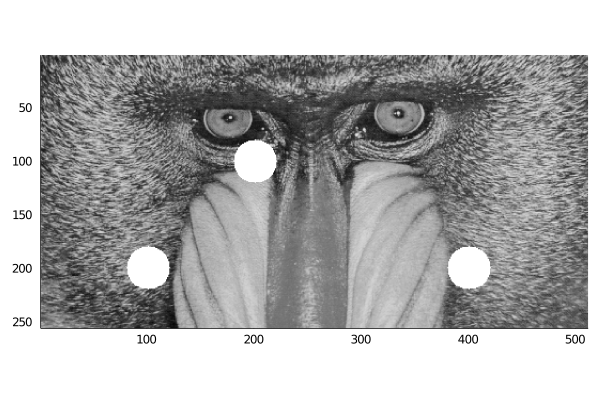

In [8]:
S = [i*size(mat,2)+j for i in 0:(size(mat,1)-1) for j in 1:size(mat,2)]
vals = mat[:]
holeyimage = ones(size(mat,1),size(mat,2))
holeyimage[S[keep]] = vals[keep]
Plots.plot(Gray.(holeyimage))

In [19]:
 # if you need
using PyPlot
using LinearAlgebra

include("polyharmonic_splines.jl") 
# contain all code from https://github.com/lstagner/OrbitTomography.jl/blob/master/src/polyharmonic.jl
# and `interpolate()`definition from https://gist.github.com/lstagner/04a05b120e0be7de9915

# x = floor.(keep/(size(mat,1)));
# y = (keep.%(size(mat,1)));
# z = holeyimage[S[keep]];
# S2 = PolyharmonicSpline(2,[x y],z)

xarray = Float64[]
yarray = Float64[]
zarray = Float64[]
for x in 80:120
    for y in 180:220
        if((x -100)^2 + (y-200)^2 > 20^2)
            xarray = append!(xarray, x);
            yarray = append!(yarray, y);
            zarray = append!(zarray, mat[y,x]);
        end
    end
end

for x in 380:420
    for y in 180:220
        if((x -400)^2 + (y-200)^2 > 20^2)
            xarray = append!(xarray, x);
            yarray = append!(yarray, y);
            zarray = append!(zarray, mat[y,x]);
        end
    end
end

for x in 180:220
    for y in 80:120
        if((x -200)^2 + (y-100)^2 > 20^2)
            xarray = append!(xarray, x);
            yarray = append!(yarray, y);
            zarray = append!(zarray, mat[y,x]);
        end
    end
end




# xgrid = ones(K)*1:size(mat,1)'
# ygrid = 1:size(mat,2)*ones(L)'

# xx = reshape(xgrid,L*K)
# yy = reshape(ygrid,L*K)

# zz = interpolate(S2,xx,yy)
# zgrid = reshape(zz,n,n);

# plot_surface(xgrid,ygrid,zgrid,alpha=0.5)
# scatter3D(x,y,z,color="r")
# show()




In [20]:

S2 = PolyharmonicSpline(2,[xarray yarray],zarray)

PolyharmonicSpline(2, 2, [0.01972519812710571, -0.052637486641287944, 0.04282864843451107, -0.05058463279155257, 0.09048477714101706, -0.11255968417776094, -0.0052424319737996794, 0.09401354626529007, -0.046134689903285724, 0.012728768847038472  …  0.04044347557789814, -0.07645130039057009, 0.08869353373721409, -0.050449555400619114, 0.028128147074769023, 0.027067034467862412, -0.014066434072070151, -1.979497455607318e-5, -0.005978228976975812, -0.011234047613412873], [80.0 180.0; 80.0 181.0; … ; 220.0 119.0; 220.0 120.0], 2.8981389721165355e-7)

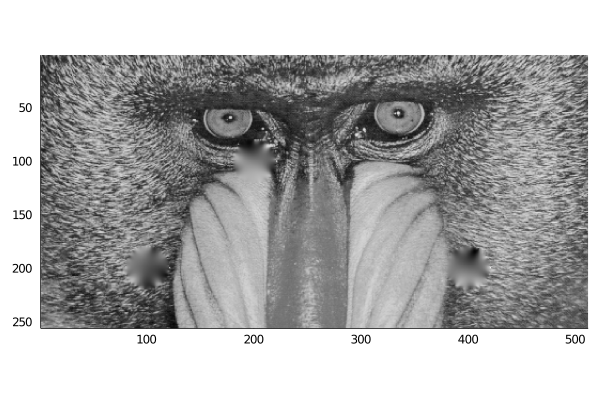

In [22]:
x=ones(41)*(80:120)';
xx = reshape(x,41*41);
y = (180:220)*ones(41)';
yy = reshape(y,41*41)
zz = interpolate(S2,xx,yy)
zz_reshape = reshape(zz, 41,41)
holeyimage_copy = copy(holeyimage)
count =1;
for i in 80:120
    for j in 180:220
        
        holeyimage_copy[j,i] = zz[count]
        count=count+1;
        
    end
end

x=ones(41)*(180:220)';
xx = reshape(x,41*41);
y = (80:120)*ones(41)';
yy = reshape(y,41*41)
zz = interpolate(S2,xx,yy)
zz_reshape = reshape(zz, 41,41)
# holeyimage_copy = copy(holeyimage)
count =1;
for i in 180:220
    for j in 80:120
        
        holeyimage_copy[j,i] = zz[count]
        count=count+1;
        
    end
end

x=ones(41)*(380:420)';
xx = reshape(x,41*41);
y = (180:220)*ones(41)';
yy = reshape(y,41*41)
zz = interpolate(S2,xx,yy)
zz_reshape = reshape(zz, 41,41)
# holeyimage_copy = copy(holeyimage)
count =1;
for i in 380:420
    for j in 180:220
        
        holeyimage_copy[j,i] = zz[count]
        count=count+1;
        
    end
end



Plots.plot(Gray.(holeyimage_copy))

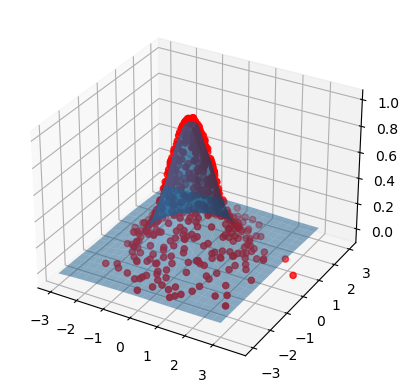

In [36]:
ENV["MPLBACKEND"]="tkagg" # if you need
using PyPlot
using LinearAlgebra

include("polyharmonic_splines.jl") 
# contain all code from https://github.com/lstagner/OrbitTomography.jl/blob/master/src/polyharmonic.jl
# and `interpolate()`definition from https://gist.github.com/lstagner/04a05b120e0be7de9915


x,y = randn(500),randn(500)
z = exp.(-(x.^2 .+ y.^2))
S2 = PolyharmonicSpline(2,[x y],z)

n=20
xgrid = ones(n)*range(-3,stop=3,length=n)'
ygrid = range(-3,stop=3,length=n)*ones(n)'

xx = reshape(xgrid,n*n)
yy = reshape(ygrid,n*n)

zz = interpolate(S2,xx,yy)
zgrid = reshape(zz,n,n);

plot_surface(xgrid,ygrid,zgrid,alpha=0.5)
scatter3D(x,y,z,color="r")
show()